In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = pd.read_csv('gold_price_update2.csv')
df = df.set_index('date')
df.index = pd.to_datetime(df.index)

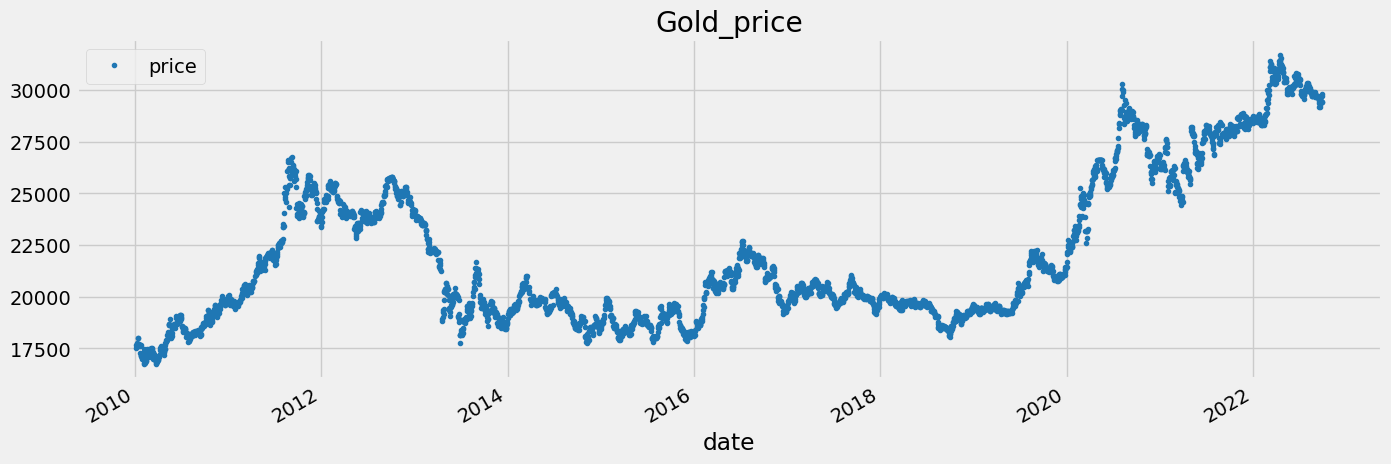

In [3]:
df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Gold_price')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


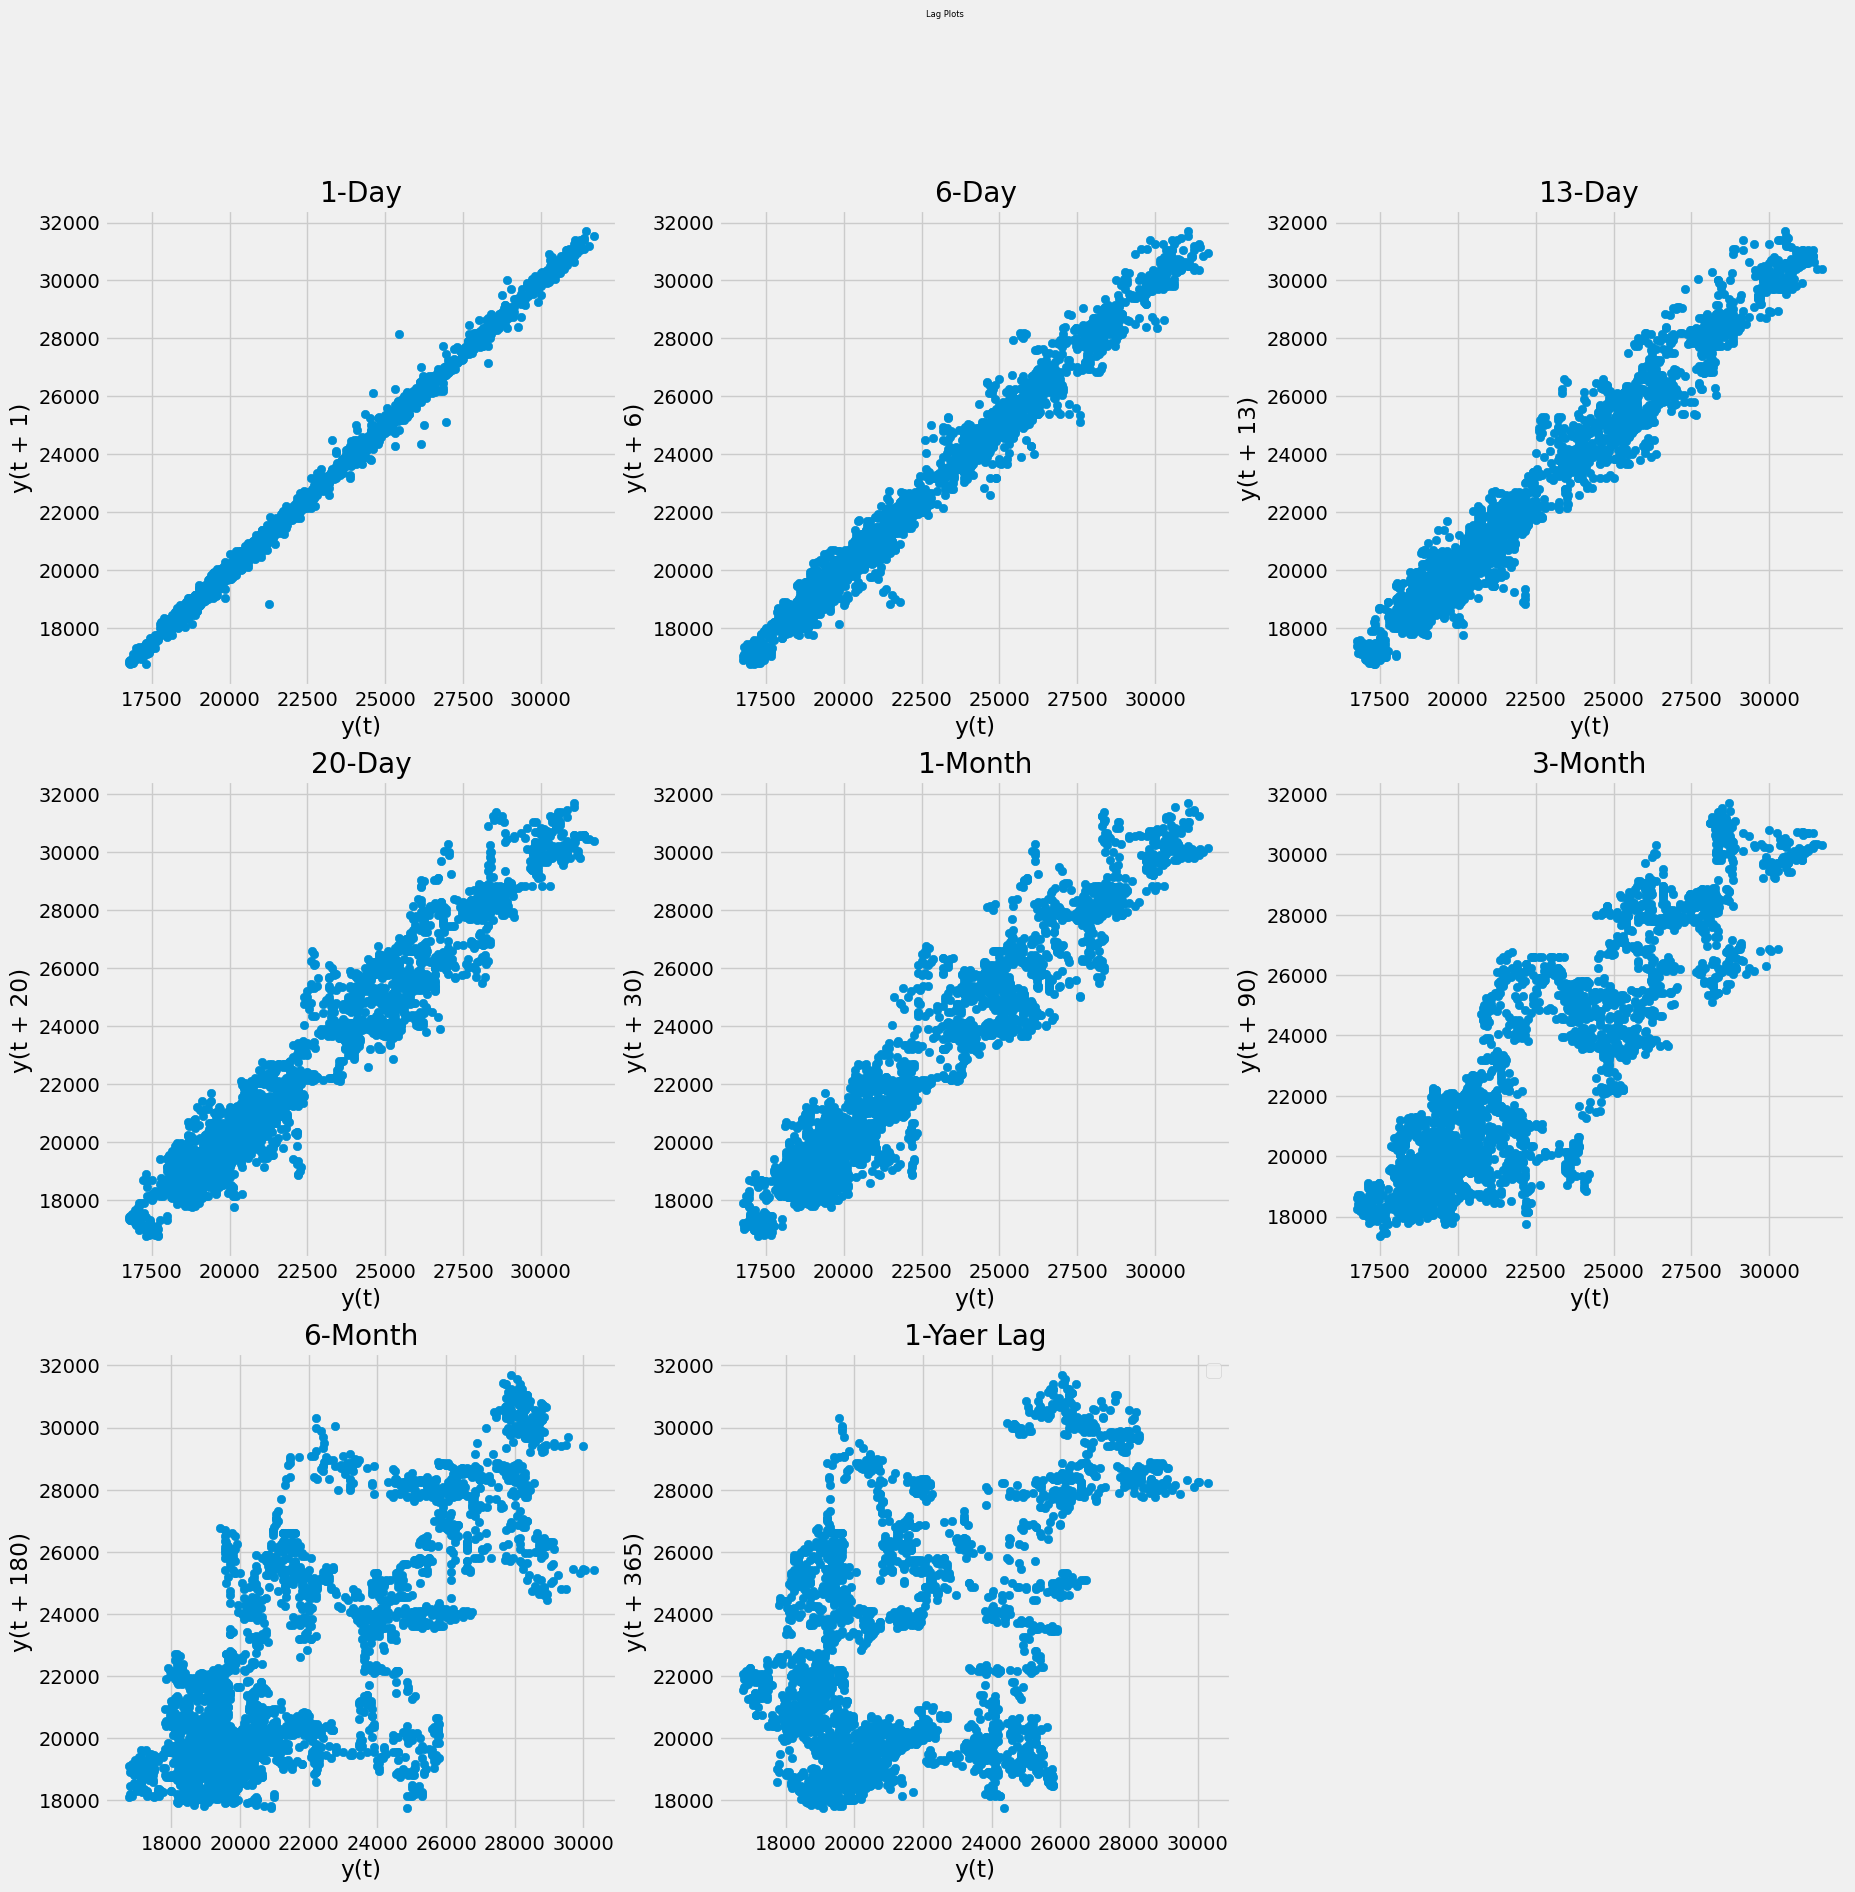

In [4]:
plt.figure(figsize=(20,20))
plt.suptitle('Lag Plots', fontsize=6)

plt.subplot(3,3,1)
pd.plotting.lag_plot(df.price[:-1], lag=1) 
plt.title('1-Day')

plt.subplot(3,3,2)
pd.plotting.lag_plot(df.price[:-1], lag=6) 
plt.title('6-Day')

plt.subplot(3,3,3)
pd.plotting.lag_plot(df.price[:-1], lag=13) 
plt.title('13-Day')

plt.subplot(3,3,4)
pd.plotting.lag_plot(df.price[:-1], lag=20) 
plt.title('20-Day')

plt.subplot(3,3,5)
pd.plotting.lag_plot(df.price[:-1], lag=30) 
plt.title('1-Month')

plt.subplot(3,3,6)
pd.plotting.lag_plot(df.price[:-1], lag=90) 
plt.title('3-Month')

plt.subplot(3,3,7)
pd.plotting.lag_plot(df.price[:-1], lag=180) 
plt.title('6-Month')


plt.subplot(3,3,8)
pd.plotting.lag_plot(df.price[:-1], lag=365) 
plt.title('1-Yaer Lag')


plt.legend()
plt.show()

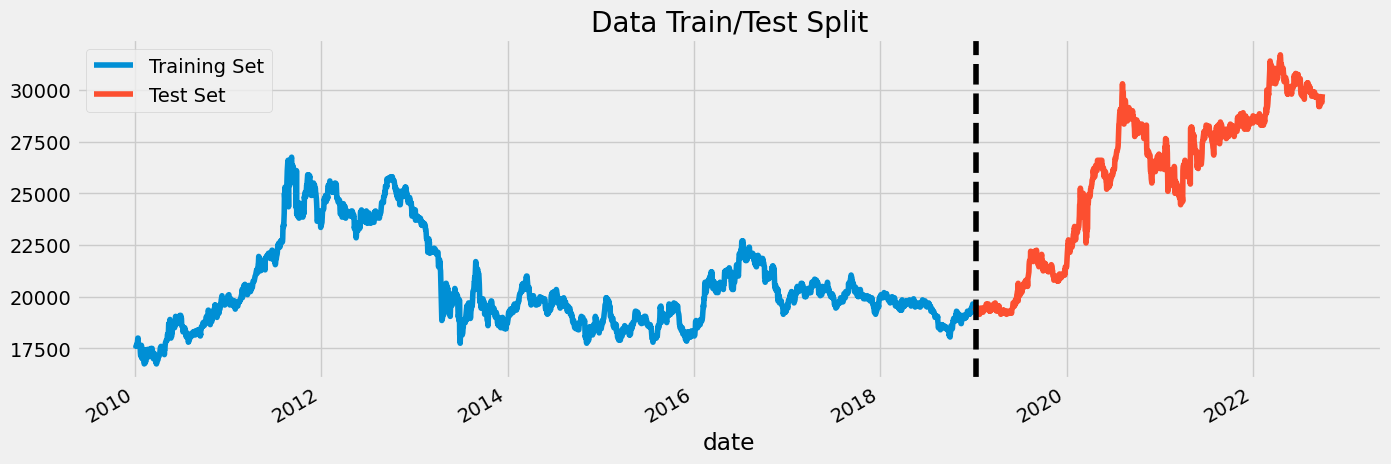

In [5]:
train = df[:2723]
test = df[2723:]
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('2019-01-10', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [6]:
df.shape
df =np.array(df)

In [7]:
dataset_X,dataset_Y= [],[]
for i in range(6,len(df)):
    dataset_X.append(df[i-6:i,0])
    dataset_Y.append(df[i,0])

dataset_X,dataset_Y=np.array(dataset_X),np.array(dataset_Y)


In [8]:
dataset_X

array([[17500, 17650, 17600, 17700, 17600, 17750],
       [17650, 17600, 17700, 17600, 17750, 18000],
       [17600, 17700, 17600, 17750, 18000, 18000],
       ...,
       [29400, 29500, 29450, 29400, 29450, 29400],
       [29500, 29450, 29400, 29450, 29400, 29400],
       [29450, 29400, 29450, 29400, 29400, 29700]], dtype=int64)

In [9]:
dataset_Y.shape

(3891,)

In [10]:
dataset_X=dataset_X.reshape(3891,6)
dataset_X=pd.DataFrame(dataset_X)
dataset_X

,0,1,2,3,4,5
0,17500,17650,17600,17700,17600,17750
1,17650,17600,17700,17600,17750,18000
2,17600,17700,17600,17750,18000,18000
3,17700,17600,17750,18000,18000,17700
4,17600,17750,18000,18000,17700,17700
...,...,...,...,...,...,...
3886,29200,29250,29400,29500,29450,29400
3887,29250,29400,29500,29450,29400,29450
3888,29400,29500,29450,29400,29450,29400
3889,29500,29450,29400,29450,29400,29400


In [11]:
dataset_X.columns = ['X1', 'X2',"X3","X4","X5","X6"]

In [12]:
dataset_X

,X1,X2,X3,X4,X5,X6
0,17500,17650,17600,17700,17600,17750
1,17650,17600,17700,17600,17750,18000
2,17600,17700,17600,17750,18000,18000
3,17700,17600,17750,18000,18000,17700
4,17600,17750,18000,18000,17700,17700
...,...,...,...,...,...,...
3886,29200,29250,29400,29500,29450,29400
3887,29250,29400,29500,29450,29400,29450
3888,29400,29500,29450,29400,29450,29400
3889,29500,29450,29400,29450,29400,29400


In [13]:
#สร้าง Dataset_Y
dataset_Y=dataset_Y.reshape(3891,1)
dataset_Y=pd.DataFrame(dataset_Y)
dataset_Y

,0
0,18000
1,18000
2,17700
3,17700
4,17650
...,...
3886,29450
3887,29400
3888,29400
3889,29700


In [14]:
dataset_Y.columns = ['Target1']

In [15]:
dataset_Y

,Target1
0,18000
1,18000
2,17700
3,17700
4,17650
...,...
3886,29450
3887,29400
3888,29400
3889,29700


In [16]:
#ทำการแบ่ง Train และ Test 

train_x = dataset_X[:2723]
train_y =dataset_Y[:2723]
test_x= dataset_X[2723:]
test_y= dataset_Y[2723:]
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((2723, 6), (2723, 1), (1168, 6), (1168, 1))

In [17]:
train_x 

,X1,X2,X3,X4,X5,X6
0,17500,17650,17600,17700,17600,17750
1,17650,17600,17700,17600,17750,18000
2,17600,17700,17600,17750,18000,18000
3,17700,17600,17750,18000,18000,17700
4,17600,17750,18000,18000,17700,17700
...,...,...,...,...,...,...
2718,19600,19550,19600,19550,19550,19450
2719,19550,19600,19550,19550,19450,19450
2720,19600,19550,19550,19450,19450,19400
2721,19550,19550,19450,19450,19400,19400


In [18]:
test_x

,X1,X2,X3,X4,X5,X6
2723,19450,19450,19400,19400,19500,19450
2724,19450,19400,19400,19500,19450,19400
2725,19400,19400,19500,19450,19400,19500
2726,19400,19500,19450,19400,19500,19400
2727,19500,19450,19400,19500,19400,19300
...,...,...,...,...,...,...
3886,29200,29250,29400,29500,29450,29400
3887,29250,29400,29500,29450,29400,29450
3888,29400,29500,29450,29400,29450,29400
3889,29500,29450,29400,29450,29400,29400


In [19]:
import pmdarima as pm

In [20]:
exogenous_features = ['X1', 'X2',"X3","X4","X5","X6"]

In [21]:
model = pm.auto_arima(train_y.Target1, exogenous=train_x[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(train_y.Target1, exogenous=train_x[exogenous_features])

forecast = model.predict(n_periods=len(test_x), exogenous=test_x[exogenous_features])
test_y["Forecast_ARIMAX"] = forecast

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=35270.745, Time=0.75 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=35262.750, Time=0.46 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=35264.763, Time=0.52 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=35264.748, Time=0.59 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=54076.384, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=35266.748, Time=0.74 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 3.194 seconds


C:\Users\hp\AppData\Local\Temp\ipykernel_23288\3530140619.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_y["Forecast_ARIMAX"] = forecast


<AxesSubplot: >

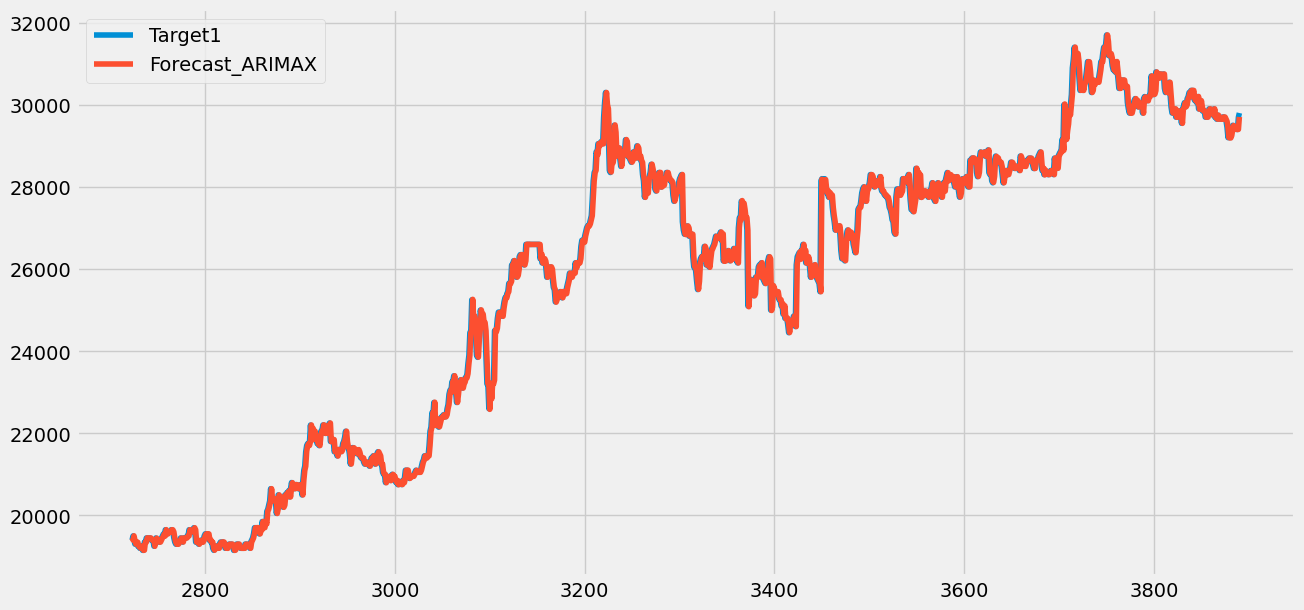

In [22]:
test_y[["Target1", "Forecast_ARIMAX"]].plot(figsize=(14, 7))

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(test_y.Target1, test_y.Forecast_ARIMAX)))
print("MAE of Auto ARIMAX:", mean_absolute_error(test_y.Target1, test_y.Forecast_ARIMAX))
print(f'R-Squrea:{r2_score(test_y.Target1, test_y.Forecast_ARIMAX)}')
print(f'MAPE: {np.mean(np.abs((test_y.Target1 - test_y.Forecast_ARIMAX)/test_y.Target1))*100}')


RMSE of Auto ARIMAX: 211.67514436999193
MAE of Auto ARIMAX: 123.82438787821708
R-Squrea:0.996709490792192
MAPE: 0.47803316491406966


In [24]:
test_y.to_csv('ARIMAX_test.csv')

In [25]:
test_x1= dataset_X[2727:2729]

In [26]:
test_x1.shape

(2, 6)

In [27]:
import pickle
pickle.dump(model, open('model1.pkl','wb'))

model = pickle.load(open('model1.pkl','rb'))


print(model.predict(n_periods=len(test_x1), exogenous=test_x1[exogenous_features]))

[19301.04418607 19353.29144676]
